In [2]:
# 绘制模糊图像和去模糊后的图像
import torch
import numpy as np
import matplotlib.pyplot as plt
orgin_iamge = []
blur_image = []
deblur_image_AB_VRDAGT = []
orgin_iamge_dir = np.genfromtxt('../data/fashion_mnist/fashion_mnist_10.csv',delimiter=',',dtype=np.float32,skip_header=1)[:,:784]
for i in range(10):
    dir = '../draw/image_deb_'+str(i)
    orgin_iamge.append(orgin_iamge_dir[i].reshape(28,28))
    blur_image.append(np.load(dir+'/blur_data.npy').reshape(28,28))
    db = torch.load(dir+'/model_avgAB_VRDAGT.pt')
    deblur_image_AB_VRDAGT.append(db['x'].reshape(28,28).numpy())


C:\Users\25657\AppData\Local\Temp\ipykernel_17296\1953557587.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  db = torch.load(dir+'/model_avgAB_VRDAGT.pt')


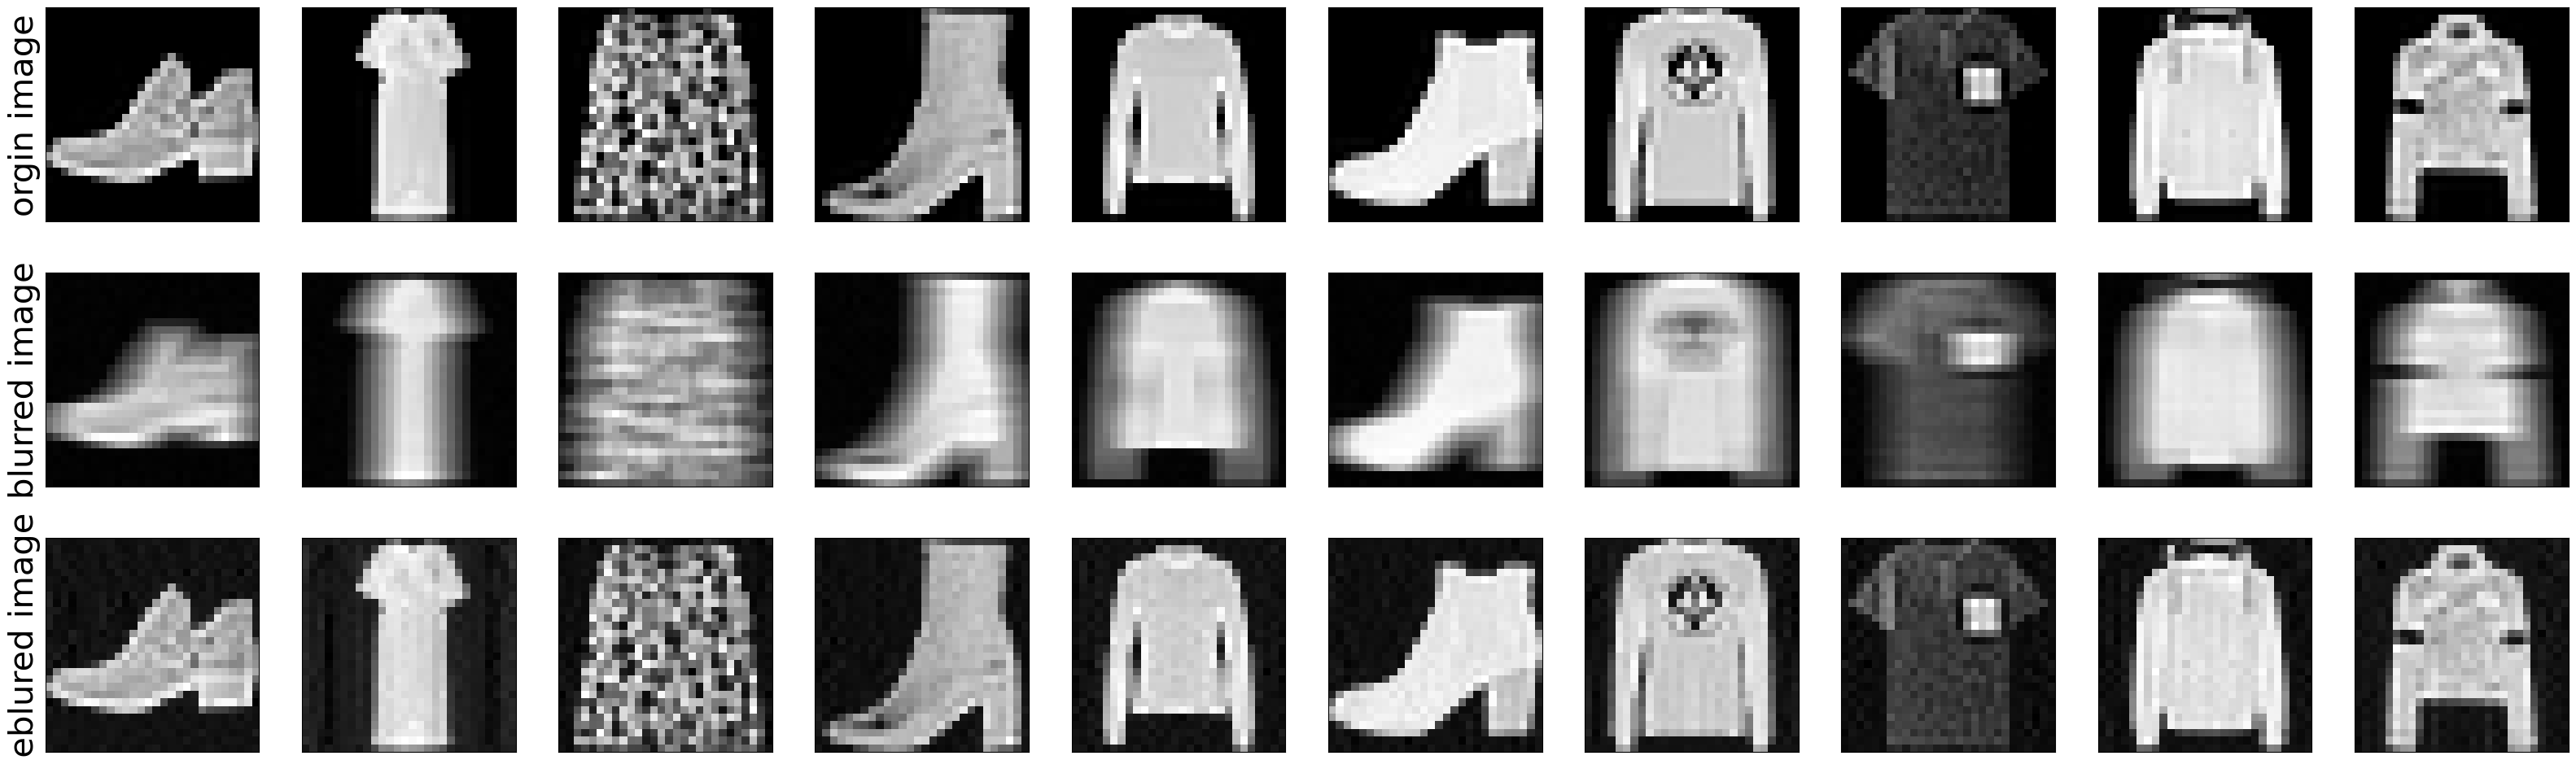

In [13]:
fig,ax = plt.subplots(3,10,figsize=(40,12))
for i in range(10):
    ax[0][i].imshow(orgin_iamge[i],cmap='gray')
    ax[1][i].imshow(blur_image[i],cmap='gray')
    ax[2][i].imshow(deblur_image_AB_VRDAGT[i],cmap='gray')
# 关闭坐标轴
for i in range(10):
    ax[0][i].set_xticks([])
    ax[1][i].set_xticks([])
    ax[2][i].set_xticks([])
    ax[0][i].set_yticks([])
    ax[1][i].set_yticks([])
    ax[2][i].set_yticks([])
size = 30
ax[0][0].set_ylabel('orgin image',fontsize=size)
ax[1][0].set_ylabel('blurred image',fontsize=size)
ax[2][0].set_ylabel('deblured image',fontsize=size)
plt.savefig('../draw/'+'fashion_mnist_deblur.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [3]:
# 从文件夹中读取psnr和ssim数据
import pandas as pd
alg_name = ['AB_DAGT','AB_SAGA','GT_VR','AB_VRDAGT']
data_psnr = pd.DataFrame(columns=alg_name)
for i in range(10):
    for alg in alg_name:
        data_psnr.loc[i,alg] = np.load('../draw/image_deb_'+str(i)+'/psnr'+alg+'.npy')[-1]
data_ssim = pd.DataFrame(columns=alg_name)
for i in range(10):
    for alg in alg_name:
        data_ssim.loc[i,alg] = np.load('../draw/image_deb_'+str(i)+'/ssim'+alg+'.npy')[-1]
# 合并数据
data=pd.concat([data_psnr,data_ssim],axis=1)
# 保存数据
data.to_csv('../draw/image_deb.csv')
        
